<a href="https://colab.research.google.com/github/MatteusStranger/recomendation_system_machine_learning/blob/master/filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)


filmes.columns = ['filme_id','titulo','generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes,generos],axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [4]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos: {modelo.labels_}')

Grupos: [2 2 0 ... 0 2 0]


In [ ]:
print(generos.columns)
print(modelo.cluster_centers_)

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa001737470>,
      dtype=object)

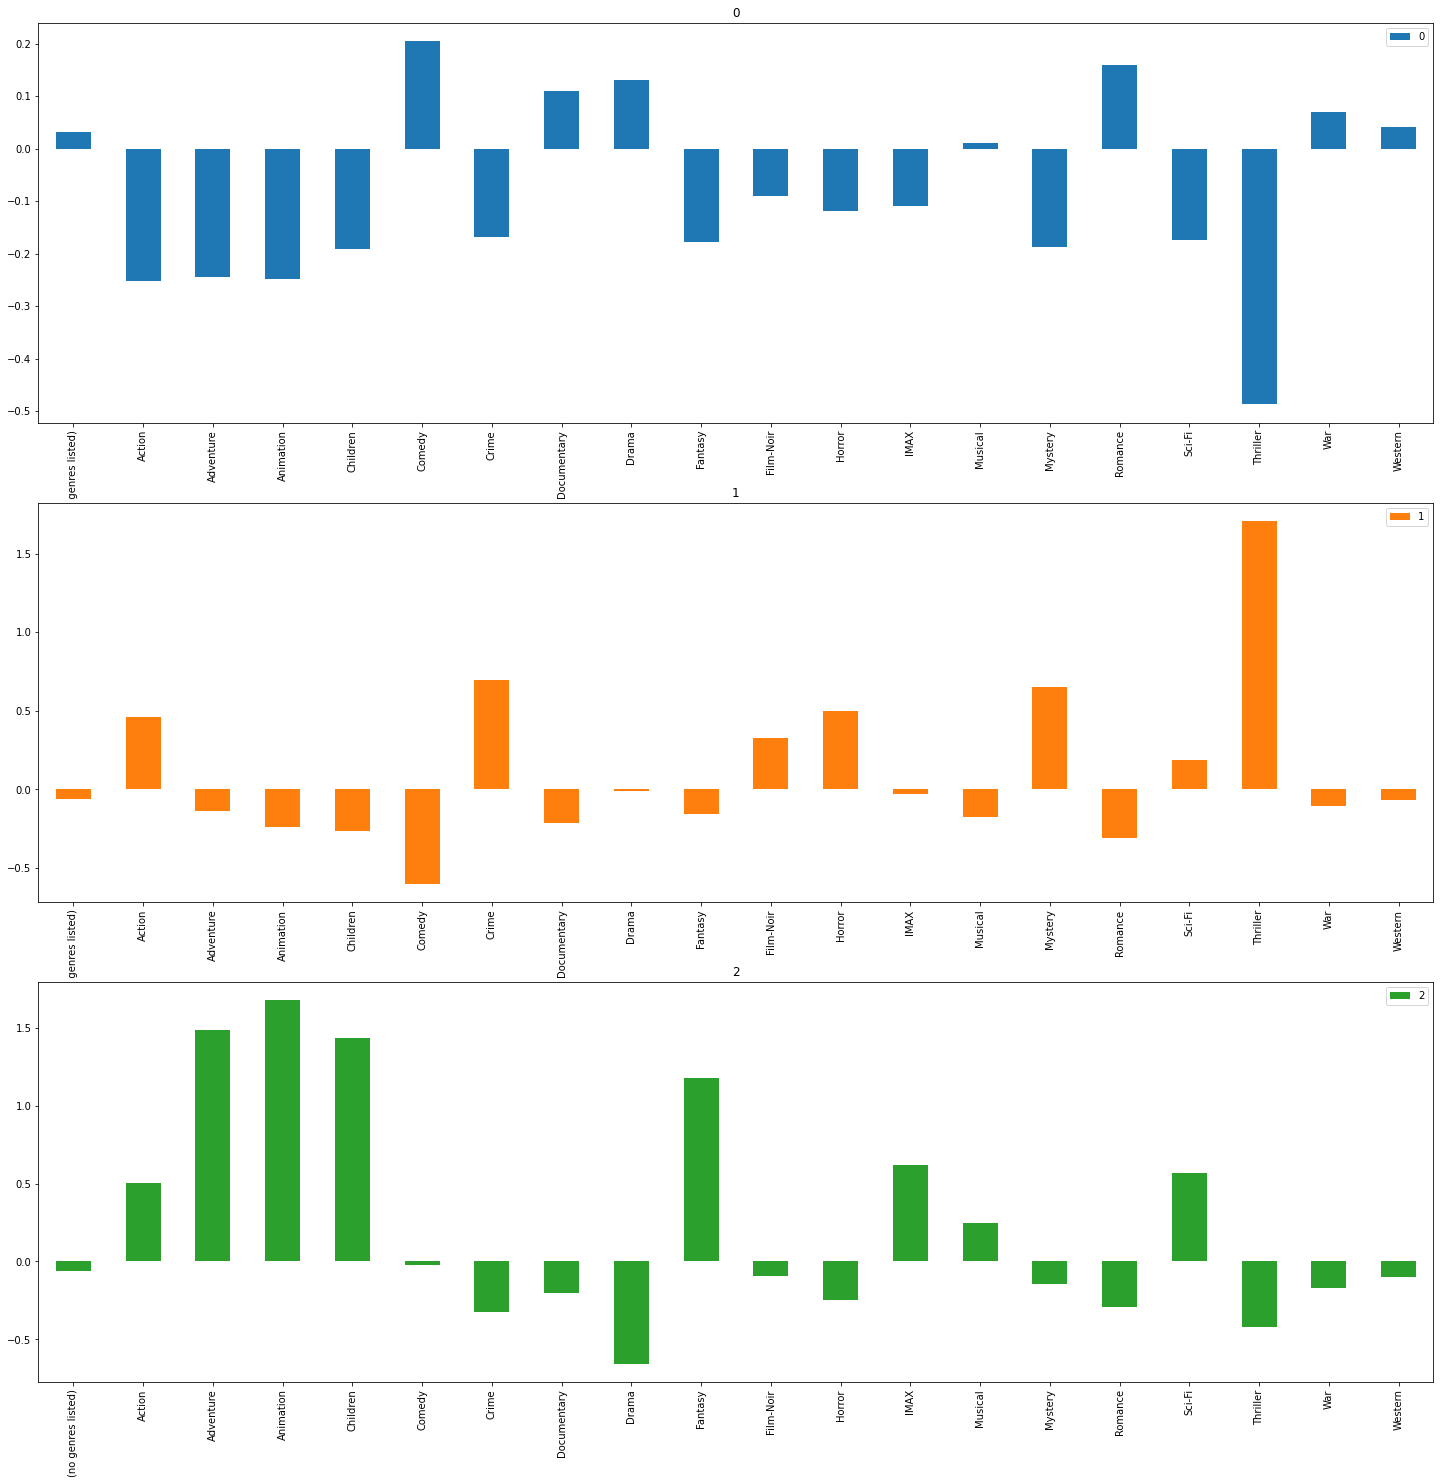

In [9]:
grupos.transpose().plot.bar(subplots=True,figsize=(25,25),sharex=False)

In [ ]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


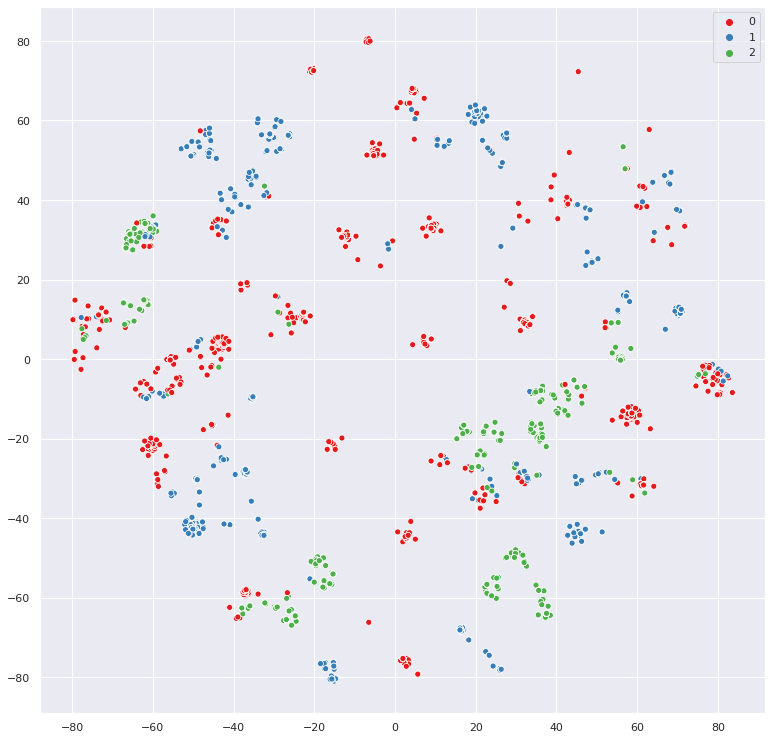

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x=visualizacao[:,0],y=visualizacao[:,1],hue=modelo.labels_,
                palette=sns.color_palette('Set1',3))